In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Decision Tree Methods to Implement

1) Dtree with default parameters
2) Dtree with hyper-parameter tunning ( Grid-search & Random-search )
3) Dtree with bagging technique
4) Dtree with boosting technique
5) Dtree with voting technique
6) Dtree with Pruning

### Peformance Evaluation Techniques

1) Stratified K-fold Cross-Validation
2) Classification Report
3) Macro/Micro/Average Metrics
4) AUC-ROC Curve
5) Multi class Log Loss (Cross-Entropy Loss)
6) Precision, Recall, and F1-Score
7) Accuracy
8) Confusion Matrix
9) Dtree visualization

In [85]:
data = pd.read_csv('cleaned.csv')

In [86]:
data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [87]:
features = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
target = ['Species']
target_names = data['Species'].unique()

X = data[features]
Y = data[target]

In [88]:
from sklearn.preprocessing import LabelEncoder

labels = data['Species'].unique()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

In [89]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for label, encoded_number in label_mapping.items():
    print(f"{label}: {encoded_number}")

Label Mapping:
Setosa: 0
Versicolor: 1
Virginica: 2


In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Shape of the Split')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Shape of the Split
(115, 4) (115,) (29, 4) (29,)


##### Model 1 with Default Parameters

In [91]:
from sklearn.tree import DecisionTreeClassifier

dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train,y_train)

DecisionTreeClassifier()

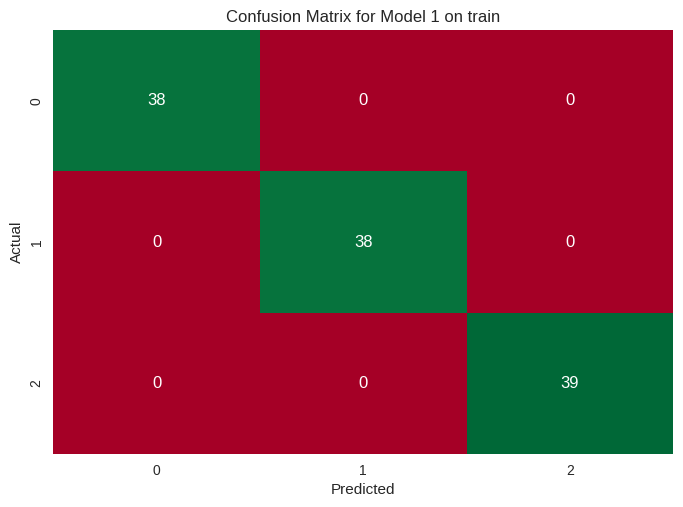

In [92]:
from sklearn.metrics import confusion_matrix

pred1 = dtree1.predict(X_train)
cm1 = confusion_matrix(y_train,pred1)

labels = np.unique(y_train)
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 1 on train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

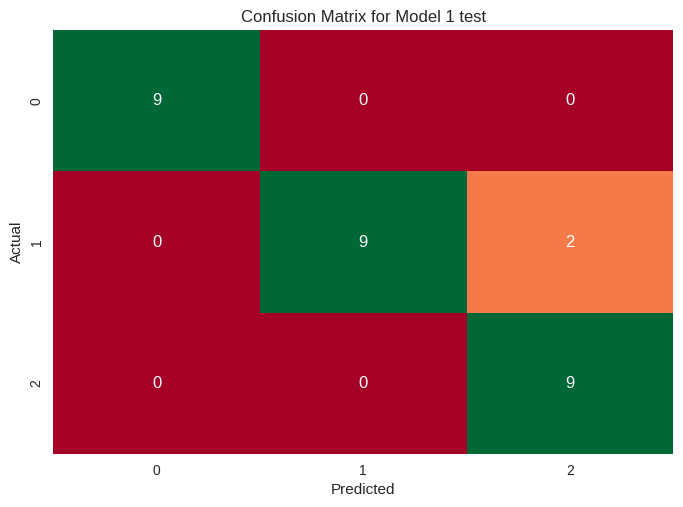

In [93]:
from sklearn.metrics import confusion_matrix

pred1 = dtree1.predict(X_test)
cm1 = confusion_matrix(y_test,pred1)

labels = np.unique(y_test)
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 1 test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dtree1, X_test, y_test, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


Sensitivity / True Positive Rate / Recall

In [95]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



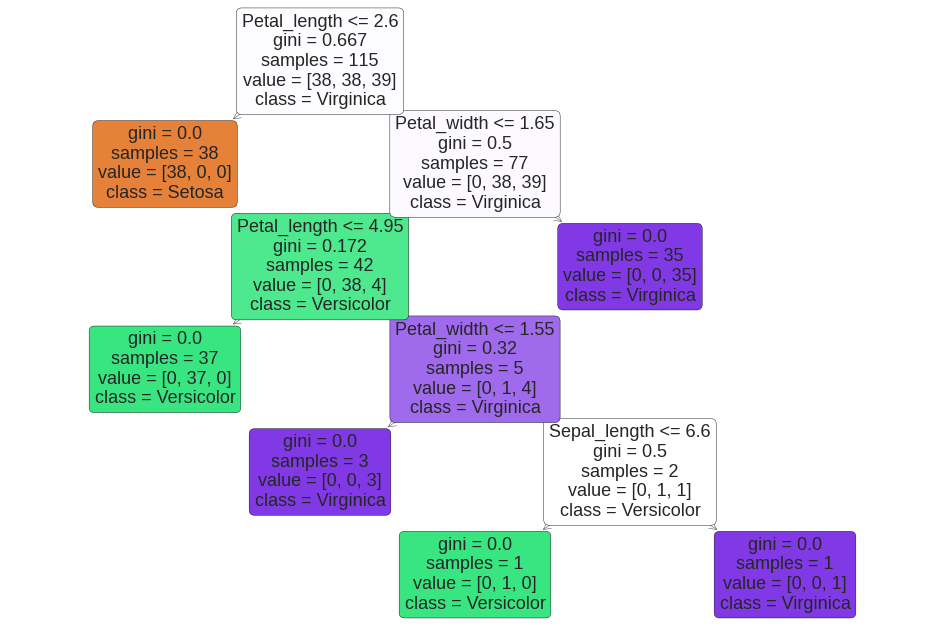

In [96]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtree1, filled=True, feature_names=features, class_names=target_names, rounded=True)
plt.show()

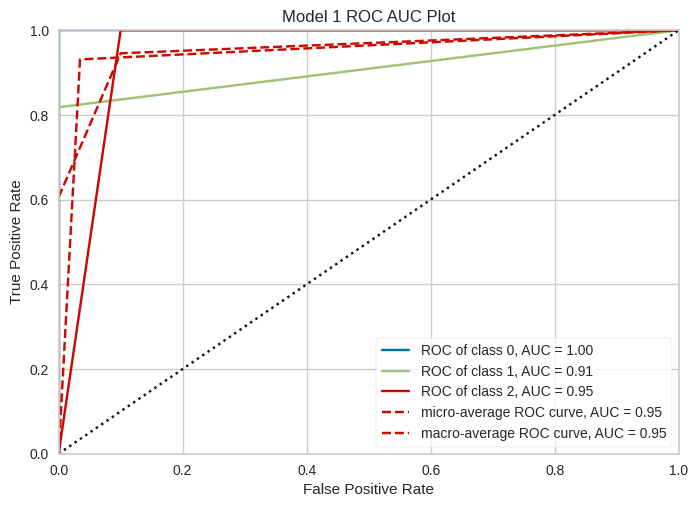

In [97]:
from yellowbrick.classifier import  ROCAUC
logrocauc = ROCAUC(dtree1, title = 'Model 1 ROC AUC Plot')
logrocauc.fit(X_train, y_train)
logrocauc.score(X_test, y_test)
logrocauc.finalize()

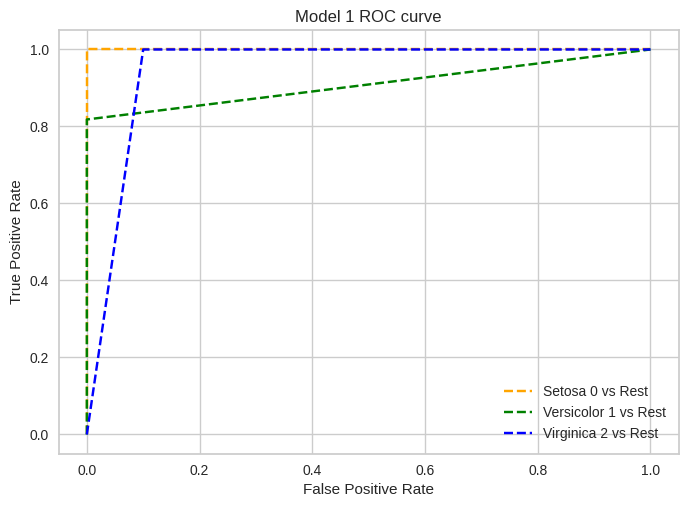

In [98]:
from sklearn.metrics import roc_curve

pred_prob1 = dtree1.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve((y_test == i).astype(int), pred_prob1[:, i])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Setosa 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Versicolor 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Virginica 2 vs Rest')
plt.title('Model 1 ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best') 
plt.show()

  

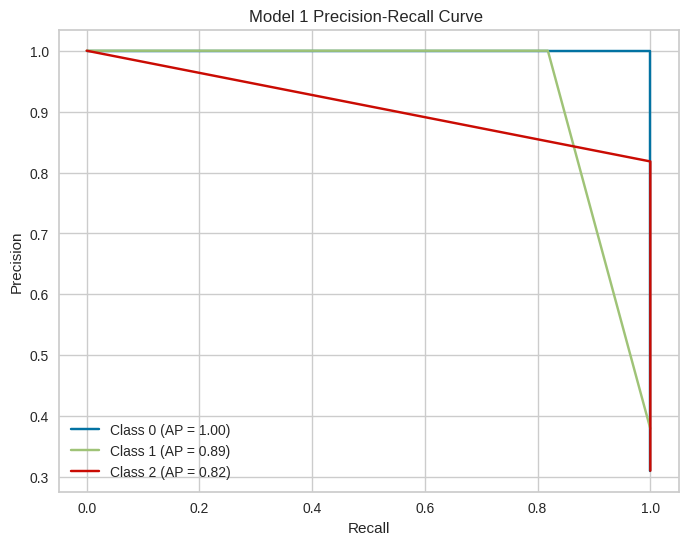

In [99]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming y_test is your true labels and pred_prob1 is the predicted probabilities
# Convert y_test to one-hot encoding
y_test_bin = label_binarize(y_test, classes=dtree1.classes_)

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision and recall for each class
for i in range(len(dtree1.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], pred_prob1[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], pred_prob1[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(dtree1.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Model 1 Precision-Recall Curve ')
plt.legend(loc='best')
plt.show()


before using grid search use manual grid search and use a single parameter to tune model and use loop
and list to store different instance of model in different parameter and plot the accouracy line plot
of train and test data.

In [100]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [101]:
from sklearn.tree import plot_tree

In [102]:
from sklearn.metrics import confusion_matrix 

In [103]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV